# Importing Libraries

In [1]:
! pip install seaborn

In [2]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-prediction-using-machine-learning/Heart-Disease.csv


# Load dataset

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-prediction-using-machine-learning/Heart-Disease.csv")

In [4]:
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [5]:
df.shape

(303, 14)

# Feature Engineering

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

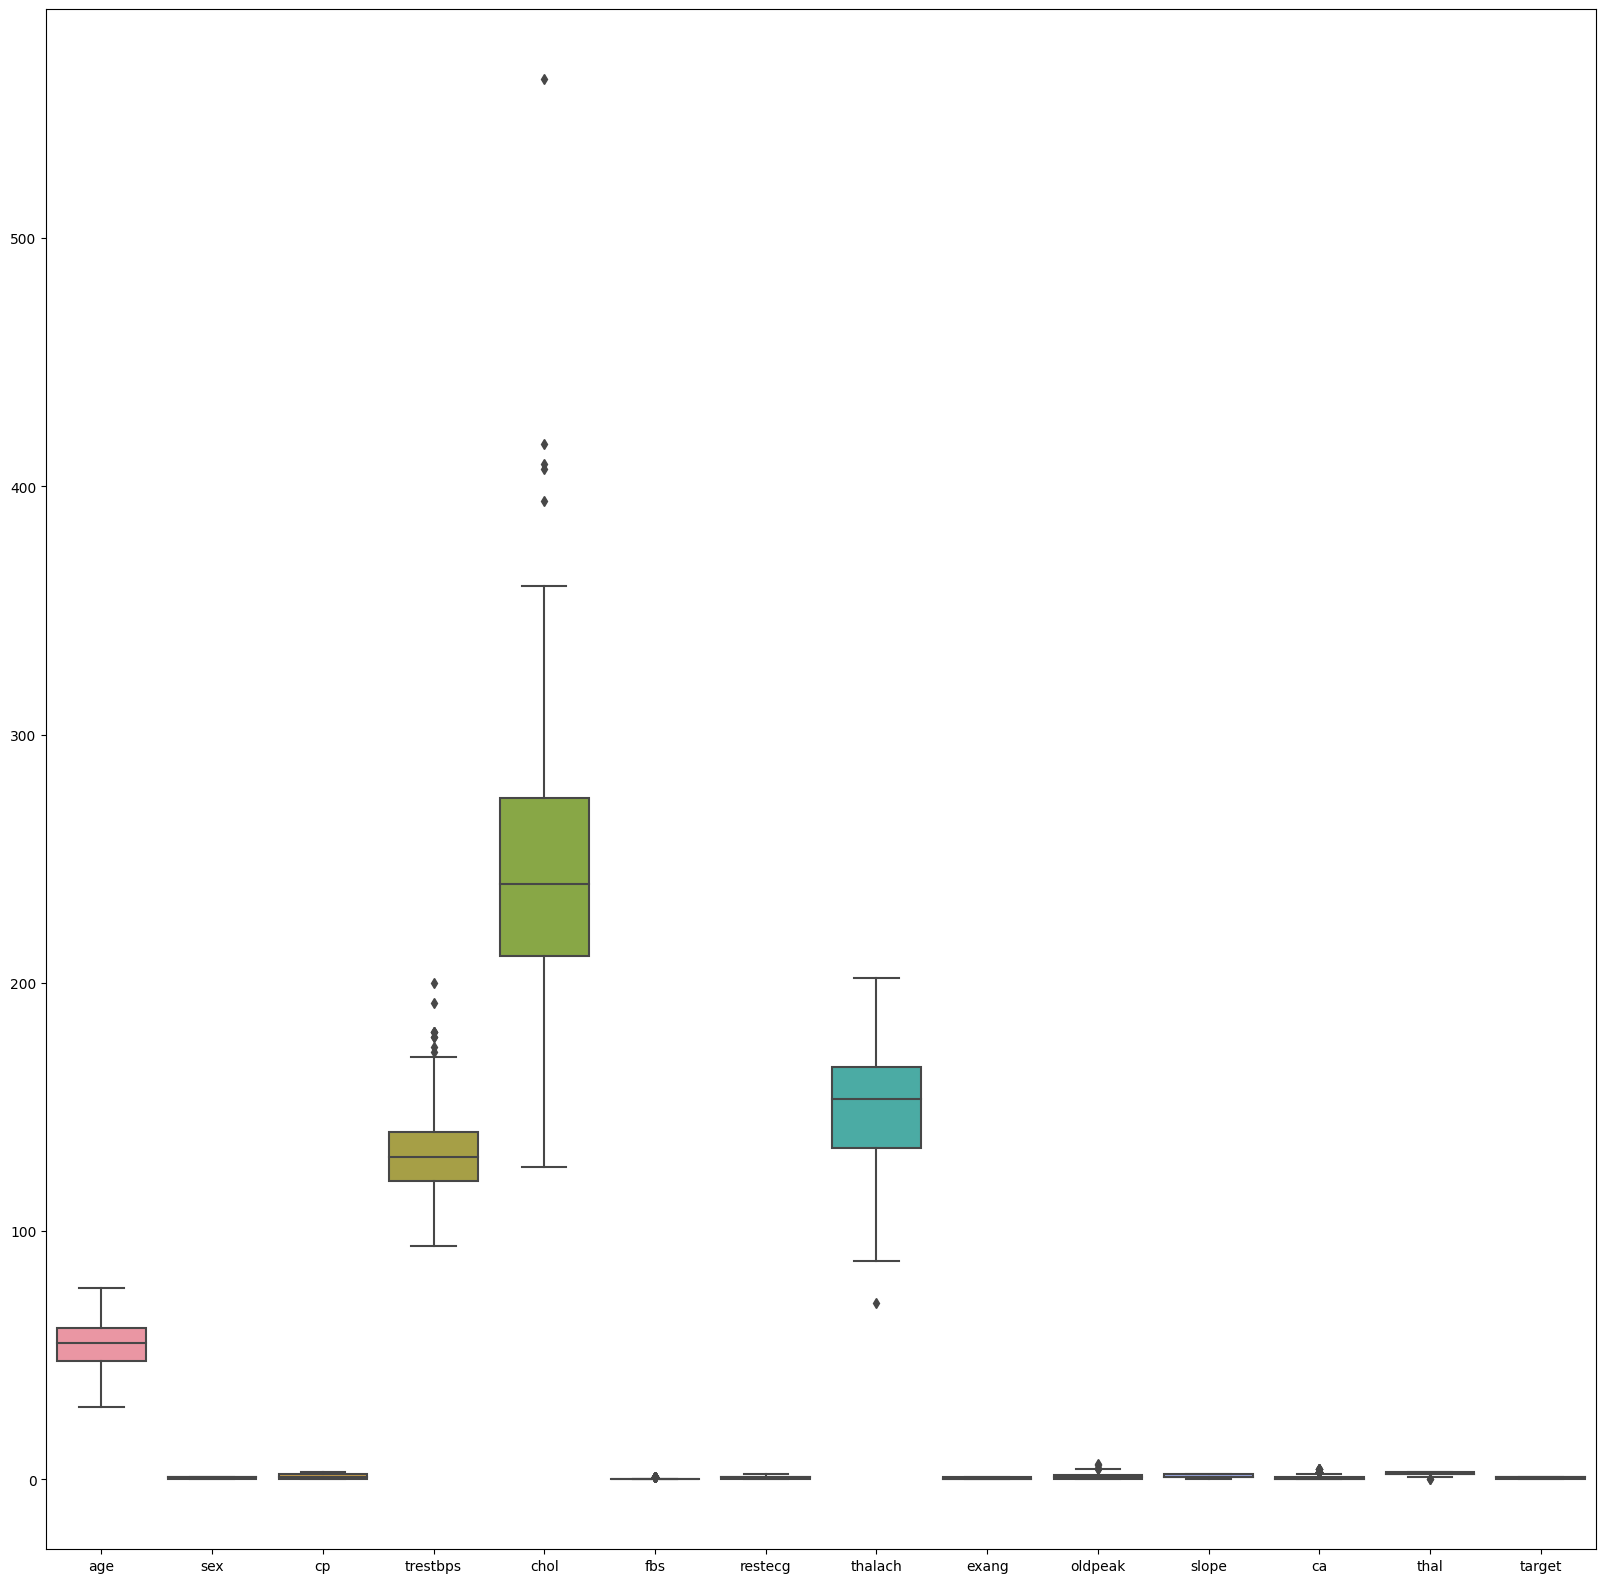

In [7]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

In [8]:
! pip install scipy
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [9]:
threshold = 3
print(np.where(z > 3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281]), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12]))


In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [11]:
df = df[(z < 3).all(axis=1)]
df.shape

(287, 14)

In [12]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(228, 14)

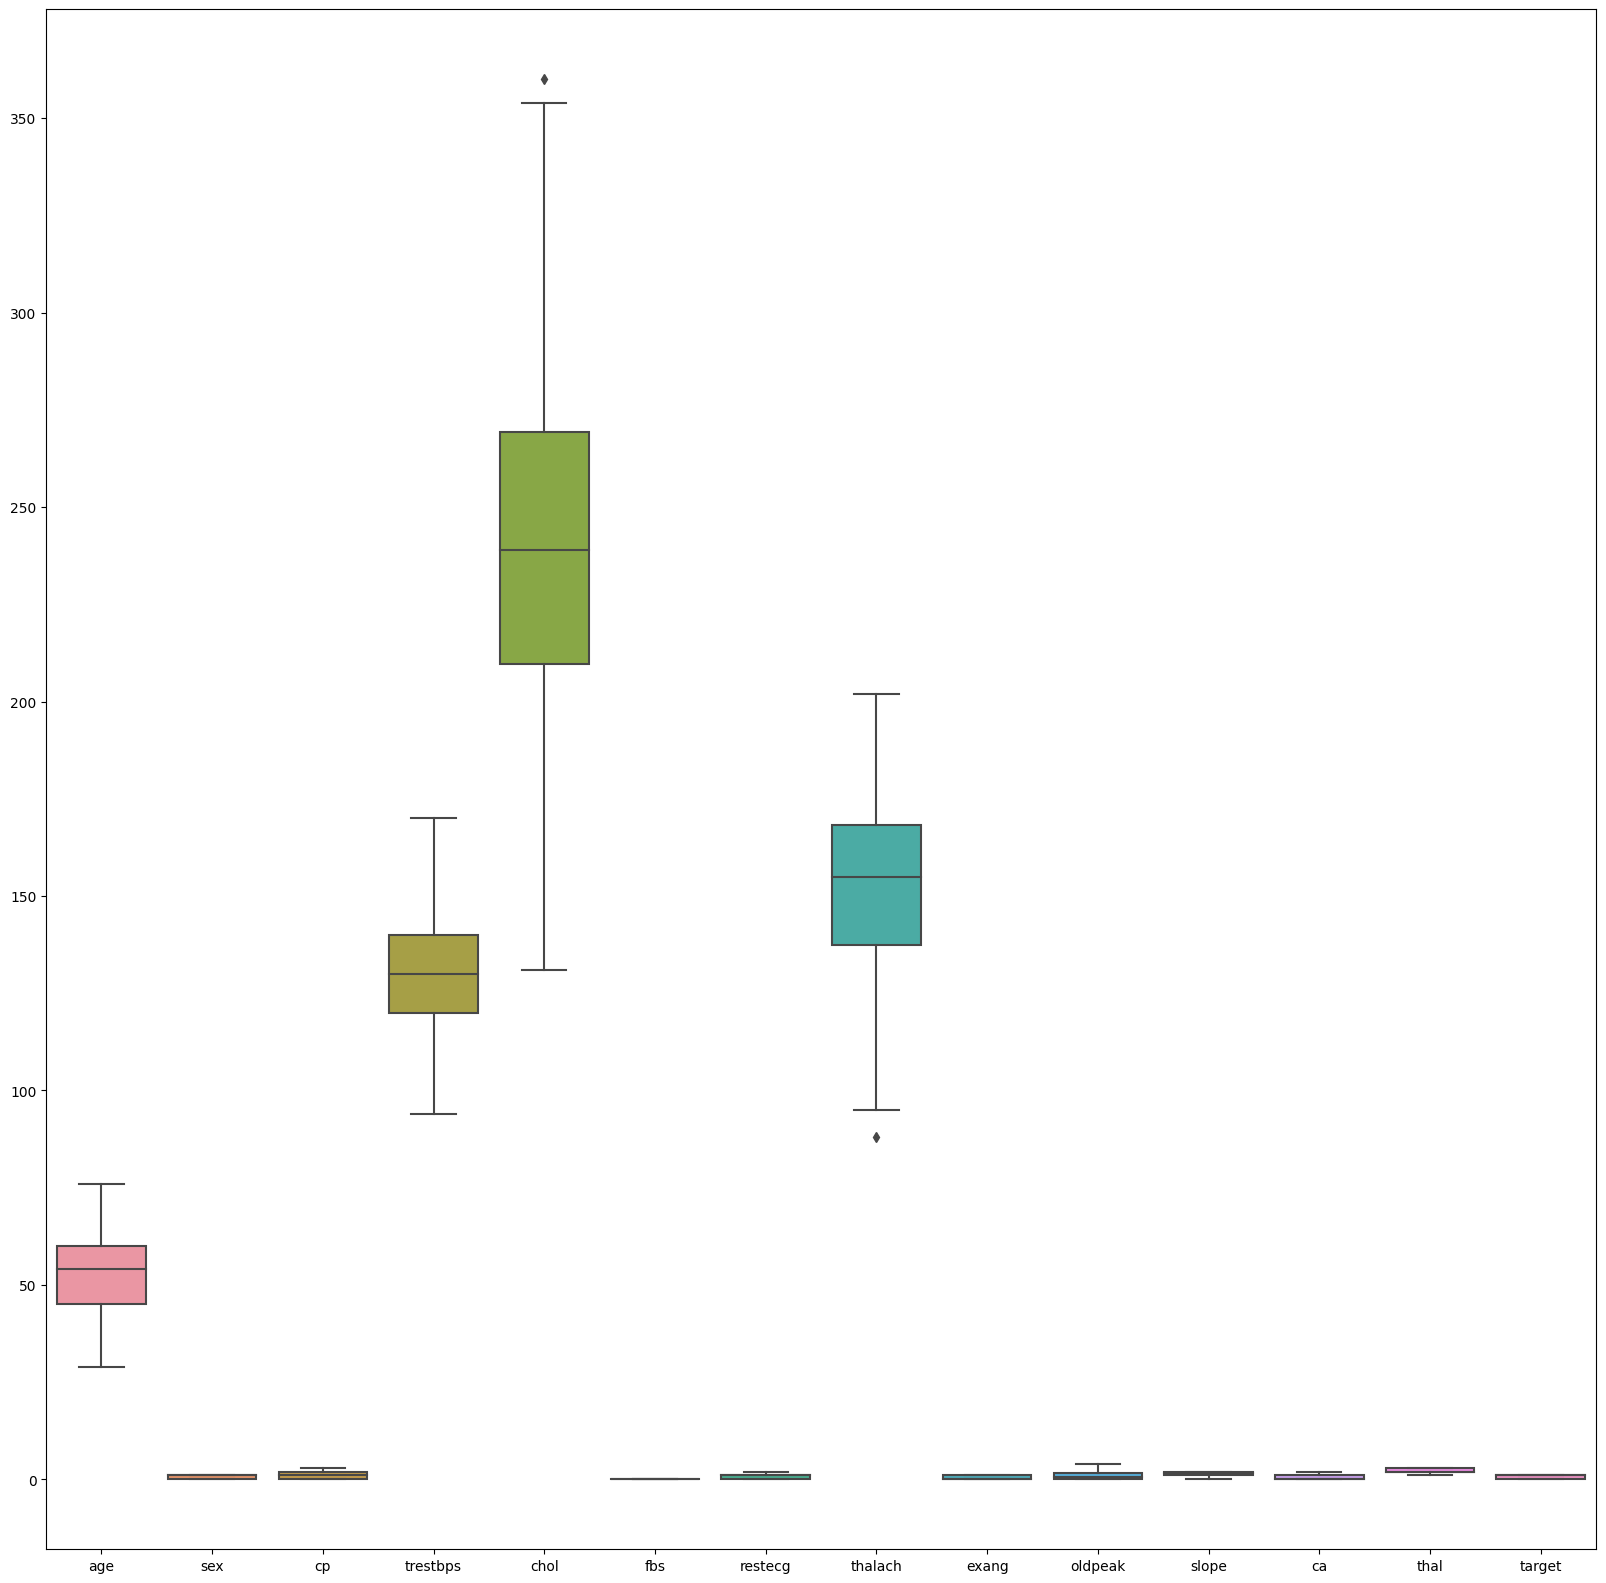

In [13]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

# Feature selection

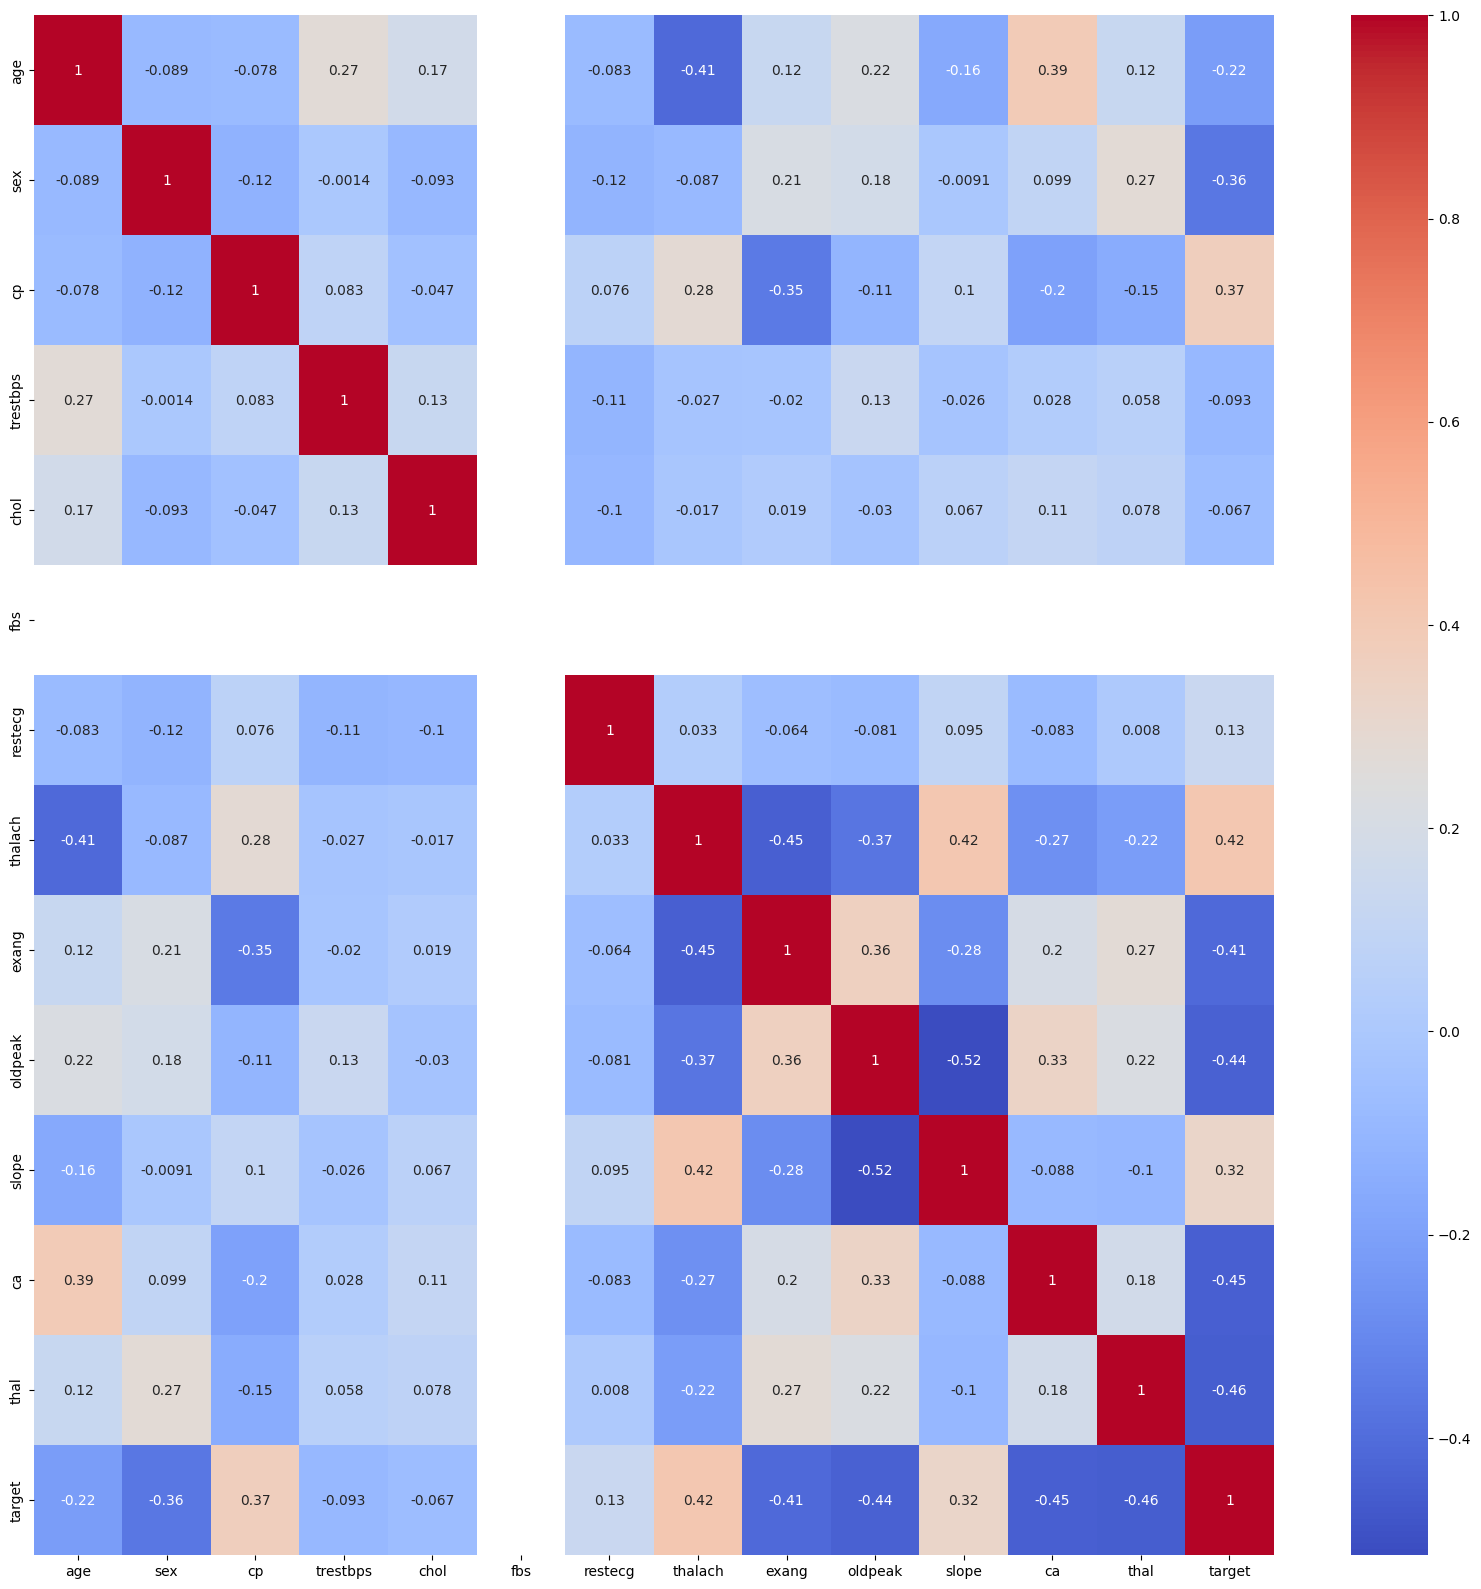

In [14]:
plt.figure(figsize=(20,20))
d = sns.heatmap(df.corr(),cmap="coolwarm",annot= True)

In [15]:
# df = df.drop(columns= "chol")
# df.head()

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


# Feature scalling

In [17]:
! pip install StandardScaler
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])# creating dummy variable
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

ERROR: Could not find a version that satisfies the requirement StandardScaler (from versions: none)
ERROR: No matching distribution found for StandardScaler


In [18]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
1,-1.773674,0.086772,0.172434,1.600895,2.472003,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
2,-1.339305,0.086772,-0.867525,0.932553,0.439382,1,True,False,False,True,...,False,False,False,True,True,False,False,False,True,False
3,0.289579,-0.566164,-0.144075,1.199890,-0.141366,1,False,True,False,True,...,False,False,False,True,True,False,False,False,True,False
4,0.398172,-0.566164,2.523646,0.531547,-0.334949,1,True,False,True,False,...,True,False,False,True,True,False,False,False,True,False
5,0.398172,0.739707,-1.138819,-0.136795,-0.528532,1,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False


In [19]:
dataset.tail()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
296,1.049726,-0.304990,-1.025780,-0.671469,-0.915698,0,True,False,True,False,...,True,False,True,False,True,False,False,False,True,False
298,0.398172,0.739707,-0.031036,-1.250699,-0.722115,0,True,False,True,False,...,True,False,True,False,True,False,False,False,False,True
299,-0.904936,-1.219100,0.488943,-0.849694,0.245799,0,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
301,0.398172,0.086772,-2.517895,-1.607149,0.245799,0,False,True,True,False,...,True,False,True,False,False,True,False,False,False,True
302,0.398172,0.086772,-0.144075,1.021665,-0.915698,0,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False


In [20]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000
mean,-2.337312e-16,-7.401487e-16,-1.012835e-16,-6.232831e-17,6.232831e-17,0.578947
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,0.494814
min,-2.642413e+00,-2.263797e+00,-2.517895e+00,-2.810165e+00,-9.156982e-01,0.000000
25%,-9.049359e-01,-5.661639e-01,-7.375302e-01,-6.046350e-01,-9.156982e-01,0.000000
50%,7.239487e-02,8.677171e-02,-7.625177e-02,1.750979e-01,-3.349494e-01,1.000000
75%,7.239487e-01,7.397074e-01,6.076344e-01,7.654671e-01,6.329653e-01,1.000000
max,2.461426e+00,2.698514e+00,2.659293e+00,2.269238e+00,2.955960e+00,1.000000


# Visualisation

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


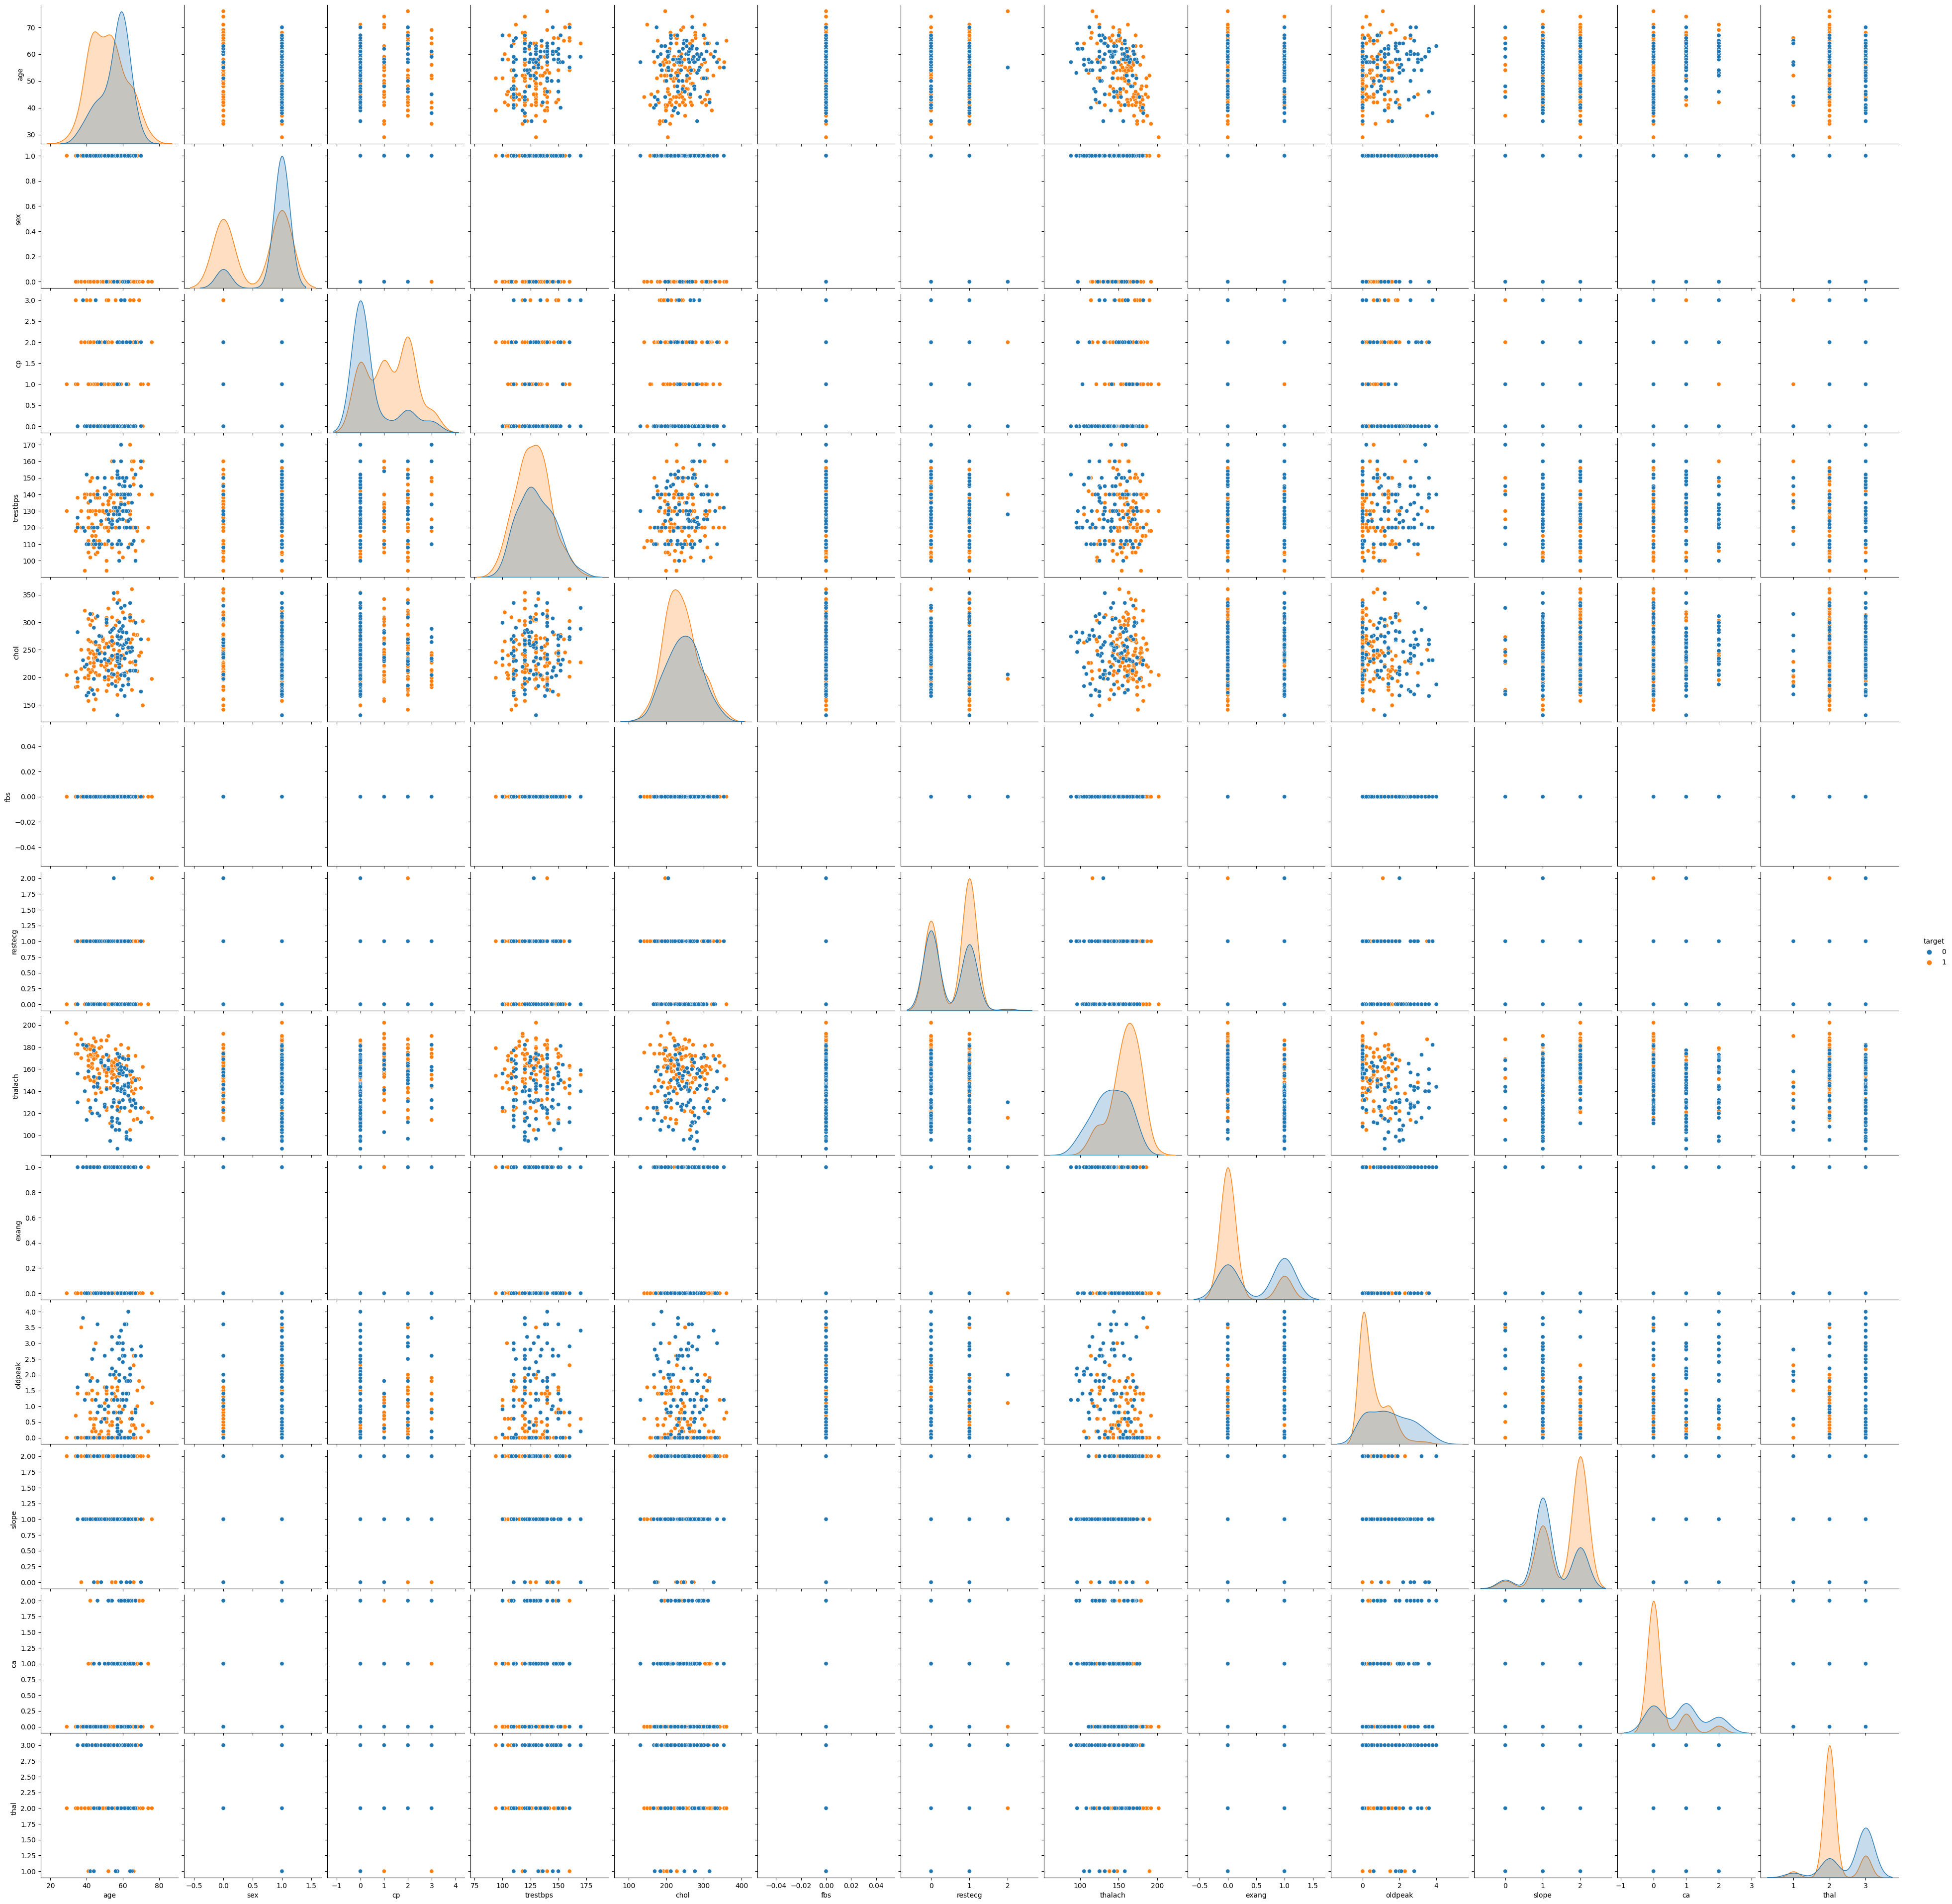

In [21]:
sns.pairplot(df , hue="target", height=3, aspect=1);

# Model selection

In [22]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1) 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)  


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## K-Nearest Neighbor Classifier

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9130434782608695

In [27]:
score.mean()

0.8014619883040934

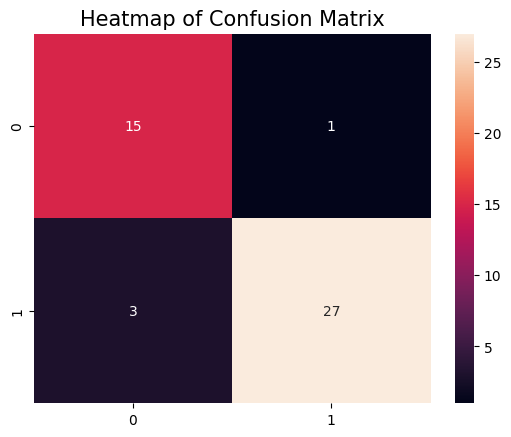

In [28]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [29]:
knn_classifier  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=1,
 weights='uniform')
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9782608695652174

In [30]:
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
score.mean()

0.8289473684210528

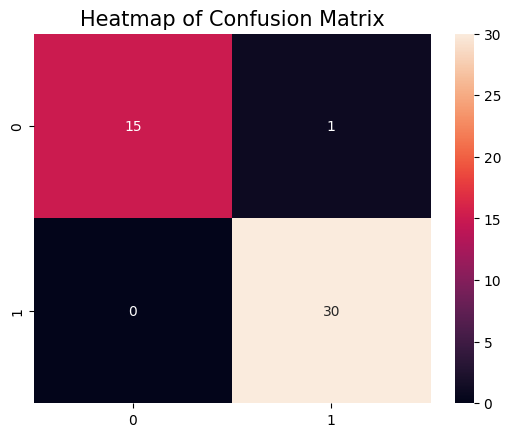

In [31]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [32]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      1.00      0.98        30

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.98        46
weighted avg       0.98      0.98      0.98        46



## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8695652173913043

In [34]:
score=cross_val_score(rf_classifier,X_train,y_train,cv=10)
score.mean()

0.7906432748538011

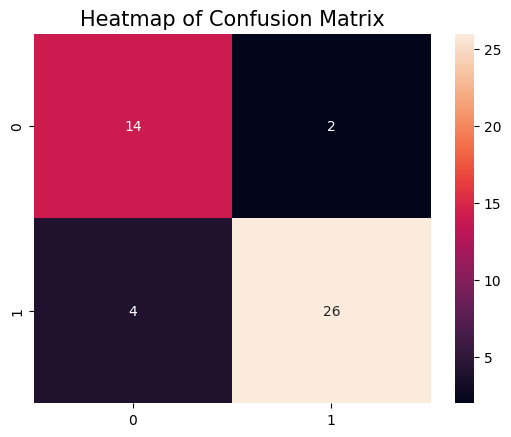

In [35]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [36]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.93      0.87      0.90        30

    accuracy                           0.87        46
   macro avg       0.85      0.87      0.86        46
weighted avg       0.88      0.87      0.87        46



## XGBoost Classifier

In [37]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.8695652173913043

In [38]:
score=cross_val_score(xgb_classifier,X_train,y_train,cv=10)
score.mean()

0.8073099415204679

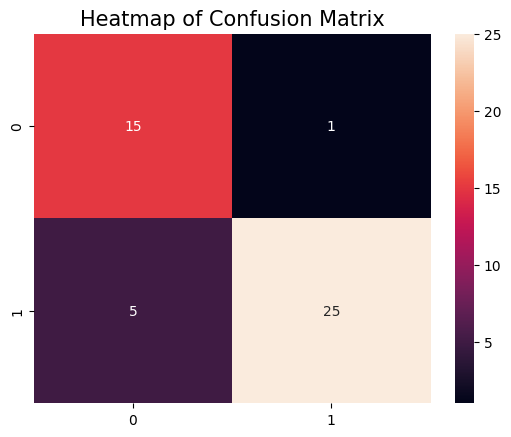

In [39]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [40]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.96      0.83      0.89        30

    accuracy                           0.87        46
   macro avg       0.86      0.89      0.86        46
weighted avg       0.89      0.87      0.87        46



## AdaBoost with Random Forest

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=100)

In [42]:
y_pred_adb = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred_adb)

0.9347826086956522

In [43]:
score=cross_val_score(ada_clf,X_train,y_train,cv=10)
score.mean()

0.7961988304093567

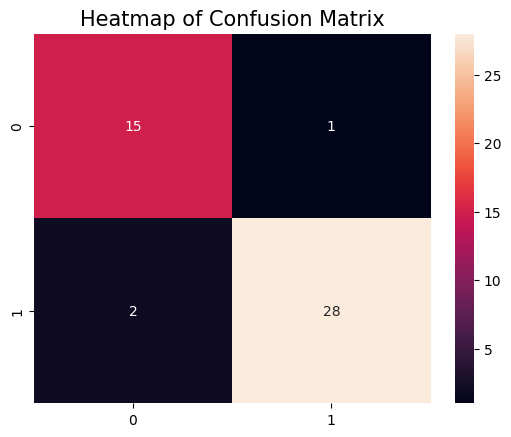

In [44]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_adb)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [45]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.97      0.93      0.95        30

    accuracy                           0.93        46
   macro avg       0.92      0.94      0.93        46
weighted avg       0.94      0.93      0.94        46



## Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [47]:
y_pred_adb = gbc_clf.predict(X_test)
accuracy_score(y_test, y_pred_adb)

0.8913043478260869

In [48]:
score=cross_val_score(gbc_clf,X_train,y_train,cv=10)
score.mean()

0.7798245614035088

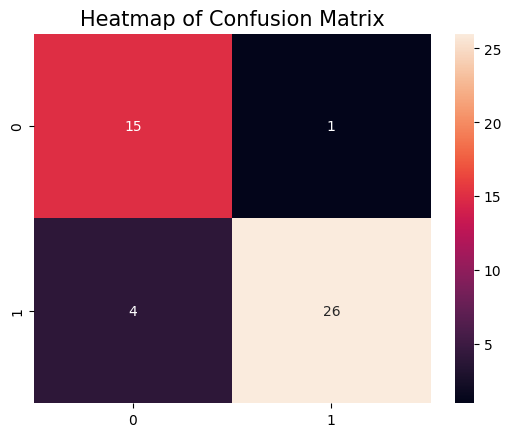

In [49]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_adb)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [50]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.96      0.87      0.91        30

    accuracy                           0.89        46
   macro avg       0.88      0.90      0.88        46
weighted avg       0.90      0.89      0.89        46



## Model save

In [51]:
## Pickle
from xgboost import XGBClassifier
import pickle

# save model
pickle.dump(knn_classifier, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))

Confusion matrix of K – Nearest Neighbor model: 
 [[15  1]
 [ 0 30]] 

Accuracy of K – Nearest Neighbor  model =  0.9782608695652174
